In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_data, train_labels),(test_data, test_labels)= imdb.load_data(num_words= 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [3]:
train_labels[0]

np.int64(1)

In [10]:
test_labels[0]

np.int64(0)

In [4]:
print(type([max(sequence) for sequence in train_data]))
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [5]:
word_index= imdb.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])
decoded_review= ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
len(reverse_word_index)

88584

In [13]:
def vectorize_sequences(sequences, dimension= 10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]= 1
    return results
X_train= vectorize_sequences(train_data)
X_test= vectorize_sequences(test_data)

In [14]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
X_train.shape

(25000, 10000)

In [16]:
y_train=np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

In [18]:
from keras import Input

model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(
    optimizer= optimizers.RMSprop(learning_rate= 0.001),
    loss= losses.binary_crossentropy,
    metrics= [metrics.binary_accuracy]
)

In [20]:
X_val= X_train[:10000]
partial_X_train= X_train[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]

In [21]:
history= model.fit(
    partial_X_train,
    partial_y_train,
    epochs= 20,
    batch_size= 512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - binary_accuracy: 0.7007 - loss: 0.6086 - val_binary_accuracy: 0.8699 - val_loss: 0.4129
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.8927 - loss: 0.3592 - val_binary_accuracy: 0.8846 - val_loss: 0.3193
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.9227 - loss: 0.2527 - val_binary_accuracy: 0.8745 - val_loss: 0.3124
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.9310 - loss: 0.2054 - val_binary_accuracy: 0.8876 - val_loss: 0.2767
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9492 - loss: 0.1643 - val_binary_accuracy: 0.8846 - val_loss: 0.2912
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - binary_accuracy: 0.9590 - loss: 0.1370 - val_binary_accuracy: 0.8847 - val_loss: 0.2952
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - binary_accuracy: 0.9621 - loss: 0.1204 - val_binary_accuracy: 0.8784 - val_loss: 0.3033
Epoch 8/20
3

In [22]:
history_dict= history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

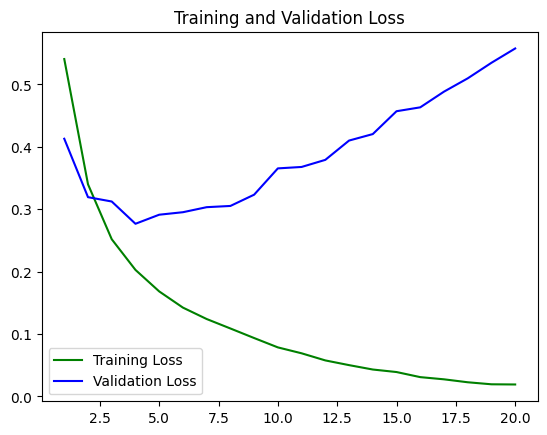

In [23]:
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
epochs= range(1, len(loss_values) +1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel=('Epochs')
plt.ylabel=('Loss Value')
plt.legend()
plt.show()


# IMDb Sentiment Classification using Keras

## ✅ 1. General Overview of the Code

This project trains a neural network model to perform **binary sentiment classification** on movie reviews from the IMDb dataset. It predicts whether a given review is **positive or negative**.

### Key Steps:
1. **Data Loading & Preprocessing**
   - Loads the IMDb dataset with the top 10,000 most frequent words.
   - Reviews are integer sequences representing word indices.
   - Sequences are vectorized into binary vectors (bag-of-words).

2. **Model Definition**
   - A `Sequential` neural network with two dense hidden layers using ReLU activation and one output layer with sigmoid activation.

3. **Compilation**
   - Optimizer: `RMSprop`
   - Loss: `binary_crossentropy`
   - Metric: `binary_accuracy`

4. **Training**
   - Training set is split into a smaller training set and a validation set.
   - Model is trained for 20 epochs using a batch size of 512.

5. **Visualization**
   - Plots training vs validation loss to observe overfitting.

---

## ✅ 2. Explanation of Key Technologies Used

### 🧠 Keras
- **What it is**: High-level API for building and training neural networks, running on top of TensorFlow.
- **Why used**: Simplifies deep learning model creation, experimentation, and deployment.
- **Used for**: Model building (`Sequential`), layers (`Dense`), training (`fit`), and evaluation.

---

### 📊 IMDb Dataset (`keras.datasets.imdb`)
- **What it is**: A dataset of 50,000 movie reviews, labeled as positive or negative.
- **Why used**: Standard benchmark dataset for text classification tasks.
- **Usage**:
  ```python
  (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
  ```

---

### 🔡 Tokenization & Vectorization

#### Tokenization:
- Words are converted into integer indices based on frequency in the dataset.

#### Vectorization:
- Converts sequences into binary vectors of length 10,000 (bag-of-words).
- `1` indicates the word is present; `0` indicates absence.

#### Why this approach?
- Enables fixed-size inputs for the neural network.
- Simplifies model training and understanding.
  
**Alternative Methods**:
- **Embedding layers**: For dense, low-dimensional word representations.
- **Recurrent/Transformer models**: Preserve word order and context.

---

### 🧮 Neural Network Architecture

```python
model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```

- **Input**: 10,000-dimension binary vector.
- **Hidden Layers**: Two layers, 16 units, ReLU activation.
- **Output**: One neuron, sigmoid activation → binary classification.

---

### 🔧 Loss, Optimizer, Metrics

```python
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
```

- **Loss**: `binary_crossentropy` — appropriate for binary classification.
- **Optimizer**: `RMSprop` — adaptive learning rate.
- **Metrics**: `binary_accuracy` — evaluates correctness of predictions.

---

### 🧪 Validation Set

- First 10,000 samples of training data are used as a **validation set**.
- Helps monitor model generalization and avoid overfitting.

---

### 📈 Loss Curve Visualization

```python
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
```

- Helps identify overfitting: Validation loss increases while training loss decreases.

---

## ✅ Summary

| Component     | Description                                      |
|---------------|--------------------------------------------------|
| Dataset        | IMDb movie reviews (binary: pos/neg)             |
| Vectorization  | Bag-of-words binary vector (length 10,000)       |
| Model          | Sequential MLP with 2 hidden layers (ReLU)       |
| Output         | Sigmoid layer for binary classification          |
| Optimizer      | RMSprop                                          |
| Loss Function  | Binary Crossentropy                              |
| Metric         | Binary Accuracy                                  |
| Visualization  | Training vs Validation Loss Curve                |

---

## ✅ Optional Extensions

- Replace vectorized inputs with an **Embedding layer** for dense word representation.
- Use **LSTM** or **GRU** layers to capture sequential context.
- Experiment with **dropout**, **batch normalization**, or **early stopping** to improve performance.

---
